In [1]:
import json
import re

import polars as pl
import seaborn as sns
import matplotlib as plt

In [2]:
with open("bench.json") as f:
    data = json.load(f)["benchmarks"]
data

[{'name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/1024',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/1024',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 7759,
  'real_time': 90142.36756732114,
  'cpu_time': 90142.11470550329,
  'time_unit': 'ns'},
 {'name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/2048',
  'family_index': 0,
  'per_family_instance_index': 1,
  'run_name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/2048',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 3852,
  'real_time': 181926.08307646675,
  'cpu_time': 181923.1840602285,
  'time_unit': 'ns'},
 {'name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/4096',
  'family_index': 0,
  'per_family_instance_index': 2,
  'run_name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/4096',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iteration

In [3]:
with open("bench.json") as f:
    data = json.load(f)

df_benchmarks = pl.from_dicts(
    [
        {
            **run,
            "n_bases": int(run["name"].split("/")[1]),
            "function": re.search(r"(?<=<)(.*?)(?=>)", run["name"]).group(),
        }
        for run in data["benchmarks"]
    ]
)

df_benchmarks

name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,n_bases,function
str,i64,i64,str,str,i64,i64,i64,i64,f64,f64,str,i64,str
"""BM_MinimizeW5K15<tb::NaiveMini…",0,0,"""BM_MinimizeW5K15<tb::NaiveMini…","""iteration""",1,0,1,7759,90142.367567,90142.114706,"""ns""",1024,"""tb::NaiveMinimize"""
"""BM_MinimizeW5K15<tb::NaiveMini…",0,1,"""BM_MinimizeW5K15<tb::NaiveMini…","""iteration""",1,0,1,3852,181926.083076,181923.18406,"""ns""",2048,"""tb::NaiveMinimize"""
"""BM_MinimizeW5K15<tb::NaiveMini…",0,2,"""BM_MinimizeW5K15<tb::NaiveMini…","""iteration""",1,0,1,1919,364870.819277,364867.436165,"""ns""",4096,"""tb::NaiveMinimize"""
"""BM_MinimizeW5K15<tb::NaiveMini…",0,3,"""BM_MinimizeW5K15<tb::NaiveMini…","""iteration""",1,0,1,956,730810.031562,730802.144351,"""ns""",8192,"""tb::NaiveMinimize"""
"""BM_MinimizeW5K15<tb::NaiveMini…",0,4,"""BM_MinimizeW5K15<tb::NaiveMini…","""iteration""",1,0,1,479,1.4632e6,1.4632e6,"""ns""",16384,"""tb::NaiveMinimize"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""BM_MinimizeW5K15<tb::InplaceMi…",2,2,"""BM_MinimizeW5K15<tb::InplaceMi…","""iteration""",1,0,1,22733,30792.085597,30791.754586,"""ns""",4096,"""tb::InplaceMinimize"""
"""BM_MinimizeW5K15<tb::InplaceMi…",2,3,"""BM_MinimizeW5K15<tb::InplaceMi…","""iteration""",1,0,1,6866,96912.71906,96911.531605,"""ns""",8192,"""tb::InplaceMinimize"""
"""BM_MinimizeW5K15<tb::InplaceMi…",2,4,"""BM_MinimizeW5K15<tb::InplaceMi…","""iteration""",1,0,1,2635,263302.698307,263297.662998,"""ns""",16384,"""tb::InplaceMinimize"""


In [4]:
df_micro_benchmarks = df_benchmarks.filter(
    (pl.col("function") != "tb::NaiveMinimize") & (pl.col("n_bases") <= 4096),
).sort(["function", "n_bases"])
x_ticks = df_micro_benchmarks["n_bases"].unique().sort()
y_ticks = df_micro_benchmarks["real_time"].unique().sort().to_numpy()

Text(0.5, 0, 'base pairs')

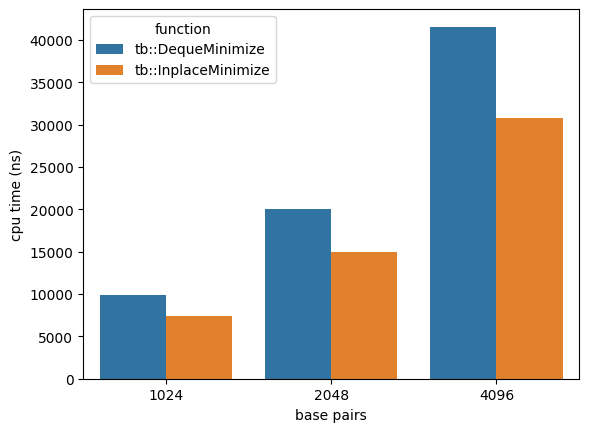

In [5]:
fig = sns.barplot(
    df_micro_benchmarks,
    x="n_bases",
    y="cpu_time",
    hue="function",
)

fig.set_ylabel("cpu time (ns)")
fig.set_xlabel("base pairs")

In [6]:
print(df_benchmarks.group_by("function").agg(
    (pl.col("cpu_time") / pl.col("n_bases")).mean().alias("avg ns per bp"),
    (pl.col("cpu_time") / pl.col("n_bases")).std().alias("std ns per bp"),
).sort("avg ns per bp", descending=True).to_pandas().to_markdown(index=False))

| function            |   avg ns per bp |   std ns per bp |
|:--------------------|----------------:|----------------:|
| tb::NaiveMinimize   |         89.2503 |        0.765395 |
| tb::DequeMinimize   |         13.9247 |        4.51882  |
| tb::InplaceMinimize |         12.465  |        5.3303   |
